# Teacher Salary Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from src.wrangle import read_and_filter_data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)

## Acquire + Prepare

In [2]:
df = read_and_filter_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252400 entries, 0 to 252399
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Fiscal Year                    252400 non-null  int64         
 1   FirstMidLastStart              252400 non-null  category      
 2   Hire Date                      252400 non-null  datetime64[ns]
 3   Hire Year                      252400 non-null  int64         
 4   Years of Employment            252400 non-null  int64         
 5   Employment Category            252400 non-null  category      
 6   Salary                         252400 non-null  float64       
 7   Salary Monetary Diff           252400 non-null  float64       
 8   Salary Delta                   252400 non-null  float64       
 9   Salary Category                252400 non-null  category      
 10  Salary Delta Category          189739 non-null  category      
 11  

In [4]:
df.head(2).T

,0,1
Fiscal Year,2019,2020
FirstMidLastStart,A DilanganiNoneDilrukshi2011-09-01,A DilanganiNoneDilrukshi2011-09-01
Hire Date,2011-09-01 00:00:00,2011-09-01 00:00:00
Hire Year,2011,2011
Years of Employment,8,9
Employment Category,6-10,6-10
Salary,79005.0,89263.0
Salary Monetary Diff,7075.0,10258.0
Salary Delta,9.84,12.98
Salary Category,60k-80k,80k-100k


In [5]:
df.tail(2).T

,252398,252399
Fiscal Year,2022,2023
FirstMidLastStart,ZyliNoneDabi2008-08-28,ZyliNoneDabi2008-08-28
Hire Date,2008-08-28 00:00:00,2008-08-28 00:00:00
Hire Year,2008,2008
Years of Employment,14,15
Employment Category,11-15,11-15
Salary,104145.0,104145.0
Salary Monetary Diff,5659.0,0.0
Salary Delta,5.75,0.0
Salary Category,100k-120k,100k-120k


In [6]:
df.describe().round().T

,count,mean,min,25%,50%,75%,max,std
Fiscal Year,252400.0,2021.0,2019.0,2020.0,2021.0,2022.0,2023.0,1.0
Hire Date,252400,2006-11-13 19:54:05.591125248,1980-02-01 00:00:00,2000-06-06 00:00:00,2006-08-31 00:00:00,2014-09-02 00:00:00,2023-06-14 00:00:00,NaN
Hire Year,252400.0,2006.0,1980.0,2000.0,2006.0,2014.0,2023.0,9.0
Years of Employment,252400.0,15.0,0.0,7.0,15.0,21.0,43.0,9.0
Salary,252400.0,97880.0,57845.0,83924.0,98644.0,111350.0,148657.0,19318.0
Salary Monetary Diff,252400.0,3802.0,0.0,515.0,2618.0,5541.0,58176.0,4373.0
Salary Delta,252400.0,4.0,0.0,1.0,3.0,5.0,101.0,6.0


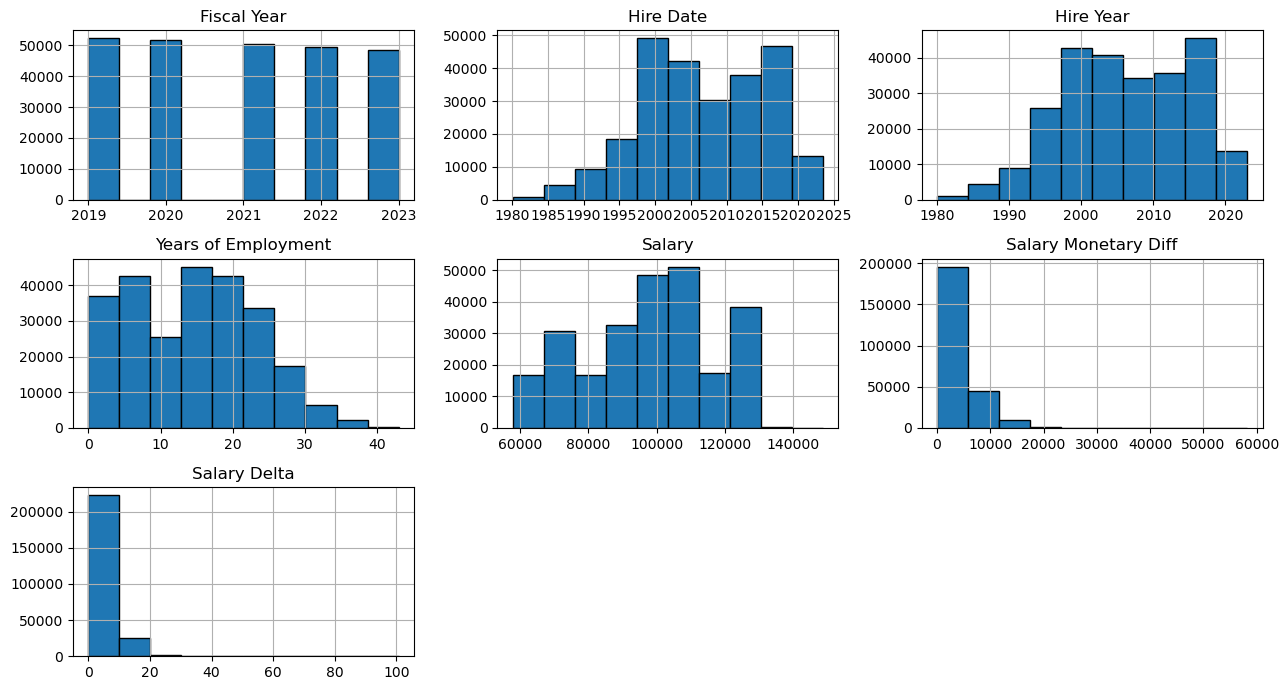

In [7]:
df.hist(figsize=(13,7), ec='black')
plt.tight_layout();

## Exploratory Data Analysis

In [8]:
numeric_cols = df.select_dtypes(include='number').columns.to_list()
category_cols = df.select_dtypes(exclude='number').columns.to_list()

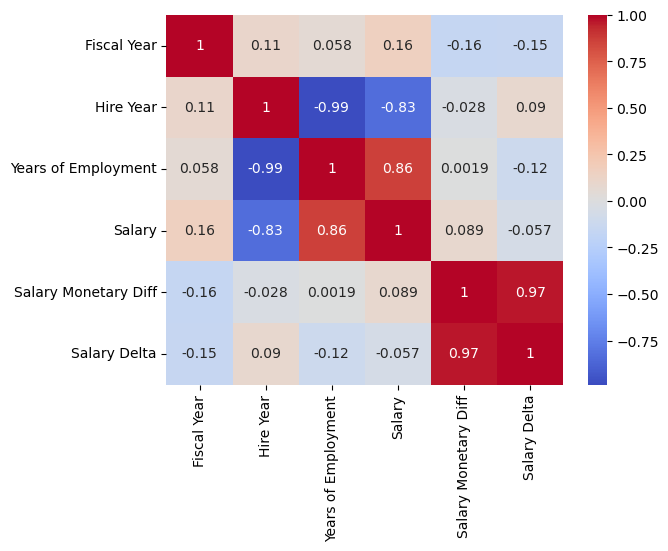

In [9]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm');

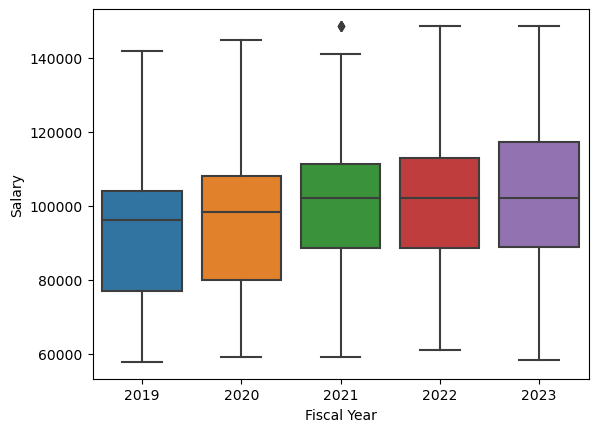

In [10]:
sns.boxplot(data=df, y='Salary', x='Fiscal Year');

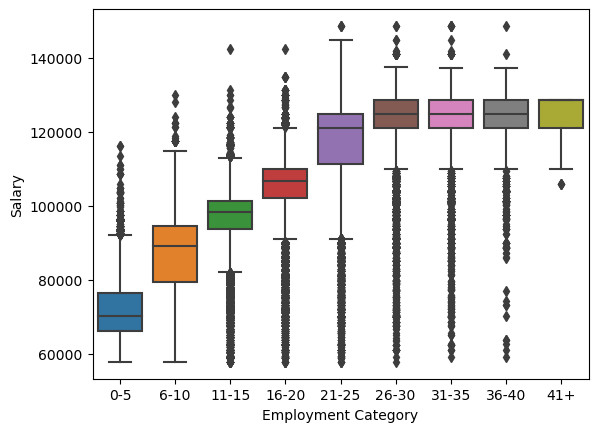

In [11]:
sns.boxplot(data=df, y='Salary', x='Employment Category');

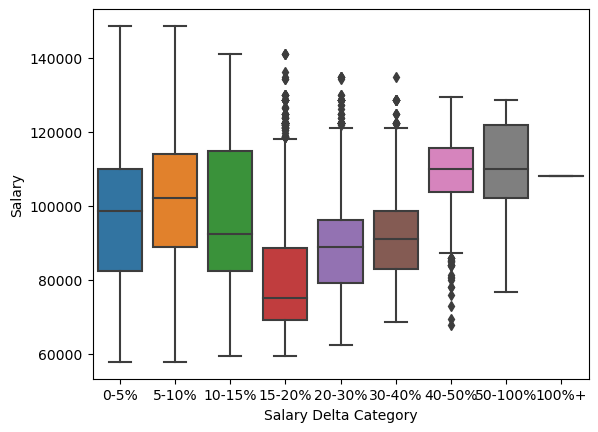

In [12]:
sns.boxplot(data=df, y='Salary', x='Salary Delta Category');

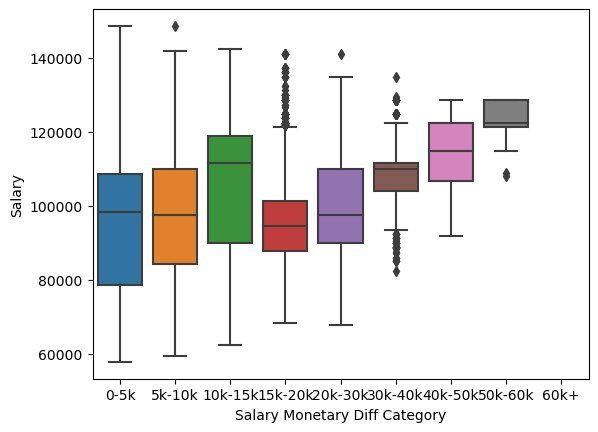

In [13]:
sns.boxplot(data=df, y='Salary', x='Salary Monetary Diff Category');

In [14]:
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Category']))
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Delta Category']))
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Monetary Diff Category']))
# test = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Delta Category']))
# test = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Monetary Diff Category']))

c:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


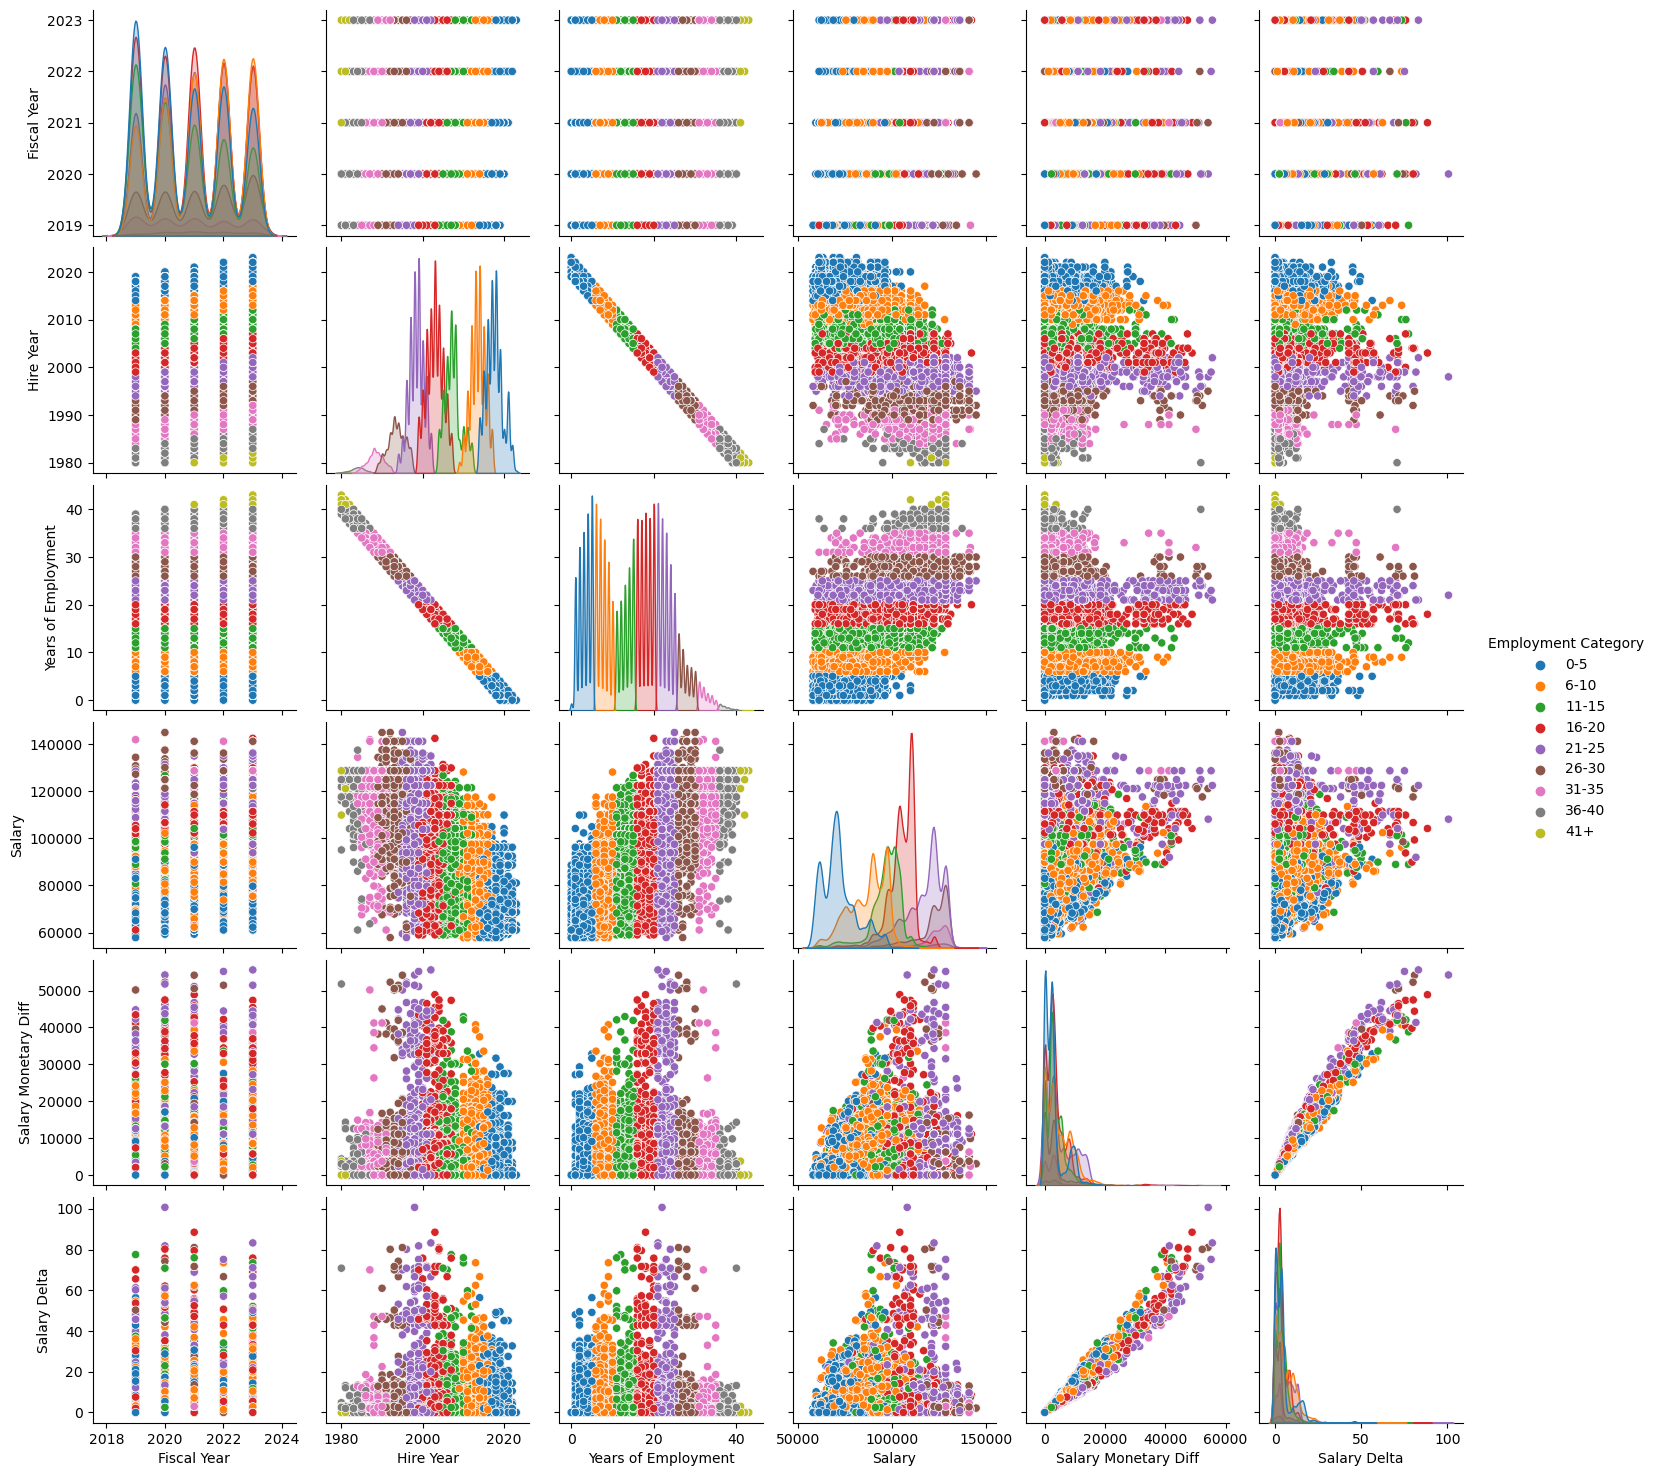

In [15]:
sns.pairplot(data=df.sample(frac=.25), x_vars=numeric_cols, y_vars=numeric_cols, hue='Employment Category');